In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [86]:
car_data = pd.read_csv('car data.csv')

In [87]:
import pandas as pd

# Load the dataset
car_data = pd.read_csv('car data.csv')

# Print the actual column names to verify their exact format
print(car_data.columns)


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [88]:
from sklearn.model_selection import GridSearchCV

# Example: Tuning Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [89]:
from sklearn.model_selection import cross_val_score

# Example: Cross-validation for Random Forest
scores = cross_val_score(RandomForestRegressor(), X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())


Cross-Validation Scores: [ 0.96498536  0.75768628 -1.62136264  0.95177322  0.76856603]
Mean Score: 0.3643296526227415


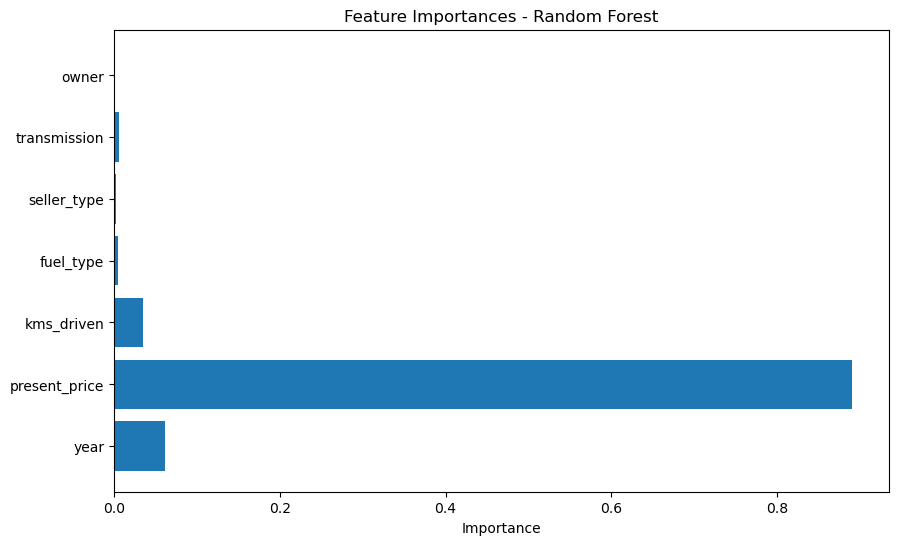

In [90]:
import matplotlib.pyplot as plt

# Fit the Random Forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Get feature importance
feature_importances = rf.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importances - Random Forest')
plt.show()


In [91]:
def preprocess_data(df):
    # Standardize column names to lowercase for consistency
    df.columns = df.columns.str.lower()

    # Handle missing values for numerical columns
    imputer = SimpleImputer(strategy='mean')
    for col in ['present_price', 'kms_driven']:  # Assuming 'present_price' might have missing values
        if col in df.columns:
            df[col] = imputer.fit_transform(df[[col]])

    # Encode categorical variables
    le = LabelEncoder()
    for col in ['fuel_type', 'seller_type', 'transmission', 'owner']:
        if col in df.columns:
            df[col] = le.fit_transform(df[col])
    
    # Drop 'car_name' as it's not a numerical feature for prediction
    df = df.drop('car_name', axis=1)

    # Separate features and target variable
    X = df.drop('selling_price', axis=1)
    y = df['selling_price']

    return X, y

In [92]:
def preprocess_data(df):
    # Standardize column names to lowercase for consistency
    df.columns = df.columns.str.lower()

    # Handle missing values for numerical columns
    imputer = SimpleImputer(strategy='mean')
    for col in ['present_price', 'kms_driven']:
        if col in df.columns:
            df[col] = imputer.fit_transform(df[[col]])

    # Encode categorical variables
    le = LabelEncoder()
    for col in ['fuel_type', 'seller_type', 'transmission', 'owner']:
        if col in df.columns:
            df[col] = le.fit_transform(df[col])

    # Drop 'car_name' as it's not a numerical feature for prediction
    if 'car_name' in df.columns:
        df = df.drop('car_name', axis=1)
    
    return df  # Make sure to return only the DataFrame


In [93]:
# Preprocess the data
car_data = preprocess_data(car_data)

# Define feature columns (all except the target 'selling_price')
X = car_data.drop(['selling_price'], axis=1)
y = car_data['selling_price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
# Preprocess the data
car_data = preprocess_data(car_data)

# Define feature columns (all except the target 'selling_price')
X = car_data.drop(['selling_price'], axis=1)
y = car_data['selling_price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:
# Train and evaluate the models
results = train_and_evaluate(X_train, X_test, y_train, y_test)

In [96]:
print("Model Performance:")
for model_name, metrics in results.items():
    print(f"{model_name}: MAE = {metrics['MAE']:.2f}, R^2 Score = {metrics['R^2 Score']:.2f}")

Model Performance:
Linear Regression: MAE = 1.21, R^2 Score = 0.85
Decision Tree: MAE = 0.77, R^2 Score = 0.94
Random Forest: MAE = 0.62, R^2 Score = 0.96
